In [20]:
from glob import glob
from os import path
from sys import stdout

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [32]:
def images_from_folder(folder_path, output_size=None, output_type=np.float32, bgr2rgb=False, interpolation=cv2.INTER_LINEAR, show_progress=True):
    list_files = glob(path.join(folder_path, '*'))
    return images_from_list_files(list_files, output_size, output_type, bgr2rgb, interpolation, show_progress), list_files


def images_from_list_files(list_files, output_size=None, output_type=np.float32, bgr2rgb=False, interpolation=cv2.INTER_LINEAR, show_progress=True):
    assert(output_size is None or len(output_size) == 2)

    n_files = len(list_files)

    im = cv2.imread(list_files[0], cv2.IMREAD_ANYCOLOR)
    is_gray = len(im.shape) == 2
    output_size = (im.shape[0], im.shape[1]) if output_size is None else output_size
    image_tensor = np.empty(shape=(n_files, output_size[1], output_size[0], 1 if is_gray else im.shape[2]), dtype=output_type)

    for i, file in enumerate(list_files):
        if show_progress:
            print('{} of {}'.format(i+1, n_files), end='\r')
            stdout.flush()

        im = cv2.imread(file, cv2.IMREAD_ANYCOLOR)

        if (not is_gray) and bgr2rgb:
            im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

        im = cv2.resize(im, output_size, interpolation=interpolation).astype(output_type)
        image_tensor[i] = np.expand_dims(im, axis=2) if is_gray else im
    if show_progress:
        print()

    return image_tensor

def image_batch(batch, n_cols=10, figsize=(10,3)):
    plt.figure(figsize=figsize)
    
    n_rows = batch.shape[0] // n_cols + 1
    for img, sub in zip(batch, range(1, len(batch)+1)):
        plt.subplot(n_rows, n_cols, sub)
        plt.imshow(img.astype(np.uint8))
        
        plt.axis('off')
    plt.tight_layout()
    plt.savefig("other_faces_2.pdf", orientation="landscape", pad_inches=0.0, bbox_inches="tight")

4 of 4


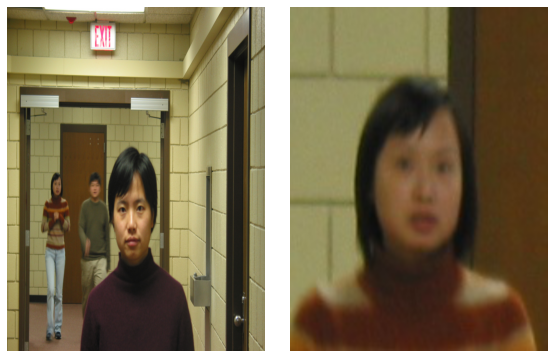

In [33]:
im, _ = images_from_folder("C:/Users/arnal/Desktop/doutorado/other faces/", bgr2rgb=True)

image_batch(im[2:], n_cols=2, figsize=(8, 10))